In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Lets get the data into the dataframe using pandas

In [21]:
#data=pd.read_csv("the_office_series.csv")
#View the dataset as i is imported
data.head()

,Episode_no,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,1,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,0,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,2,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,0,Ken Kwapis,B. J. Novak
2,3,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,0,Ken Whittingham,Paul Lieberstein
3,4,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,0,Bryan Gordon,Michael Schur
4,5,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,0,Greg Daniels,Greg Daniels


## Lets check for the datatypes of columns and see if we need to change anyone. As there is date column, which may need to change

In [20]:
data.dtypes

Episode_no               int64
Season                   int64
EpisodeTitle            object
About                   object
Ratings                float64
Votes                    int64
Viewership             float64
Duration                 int64
Date            datetime64[ns]
GuestStars              object
Director                object
Writers                 object
dtype: object

## As we have gussed, date is object type. It is better to change that to datetime.

In [8]:
data['Date']=pd.to_datetime(data['Date'])
print(data.dtypes)

Unnamed: 0               int64
Season                   int64
EpisodeTitle            object
About                   object
Ratings                float64
Votes                    int64
Viewership             float64
Duration                 int64
Date            datetime64[ns]
GuestStars              object
Director                object
Writers                 object
dtype: object


## First Column should be episode number irrespective of the season noumber. Further, it should start from 1.

In [17]:
data= data.rename(columns={"Unnamed: 0":"Episode_no"})

In [19]:
data['Episode_no']=data["Episode_no"]+1

## Now see if any column have any missing values

In [18]:
data.isna().sum()

Episode_no      0
Season          0
EpisodeTitle    0
About           0
Ratings         0
Votes           0
Viewership      0
Duration        0
Date            0
GuestStars      0
Director        0
Writers         0
dtype: int64

## Only Guest Starts have missing values as many episodes may not have any guest start in it. It is better to convert it into 0 than keeping it has NaN.

In [13]:
data=data.fillna({'GuestStars':0})

## Now our dataset doesnot have any missing value and all dtypes are set to desired ones. Lets dive into graphical EDA and see what we have in our dataset.
1. See viewership based on episodes

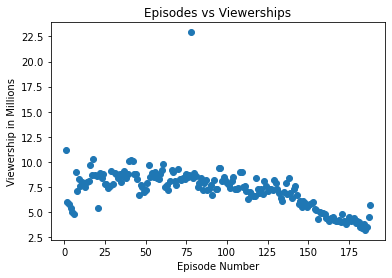

In [24]:
plt.scatter(data['Episode_no'], data['Viewership'])
plt.xlabel('Episode Number')
plt.ylabel('Viewership in Millions')
plt.title('Episodes vs Viewerships')
plt.show()

## Above Figure is good. We can see that viewership declined with time. Plus there is one outlier with 22.5 million viwership. 
Graphical EDA helps to identify the outliers also. We need to remove this one by identifying it.

In [47]:
#Find the season number where outlier was obsereved
season_no=int(data.loc[data['Viewership']>15, 'Season'])
#Find the average of rating of that season
season_avg=data.loc[data['Season']==season_no, 'Viewership'].mean()
#Replace outlier with the average value
data.loc[data['Viewership']>15, 'Viewership']=season_avg

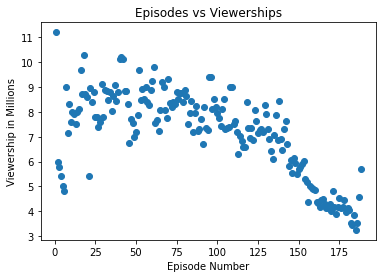

In [48]:
plt.scatter(data['Episode_no'], data['Viewership'])
plt.xlabel('Episode Number')
plt.ylabel('Viewership in Millions')
plt.title('Episodes vs Viewerships')
plt.show()

## We need to see whether the viewership decreased with decreased in rating also. But our rating column is a float and it is difficult to give colors to above scatter plot based on this. We need to make categories of these columns.

In [66]:
range=[0,7,8,9,10]
names=['0-7','7-8','8-9','9-10']
data['rating_cat']=pd.cut(data['Ratings'], bins=range, labels=names)
data['rating_cat'].head()

0    7-8
1    8-9
2    7-8
3    8-9
4    8-9
Name: rating_cat, dtype: category
Categories (4, object): ['0-7' < '7-8' < '8-9' < '9-10']

In [67]:
data['rating_cat'].value_counts()

8-9     104
7-8      63
9-10     15
0-7       6
Name: rating_cat, dtype: int64

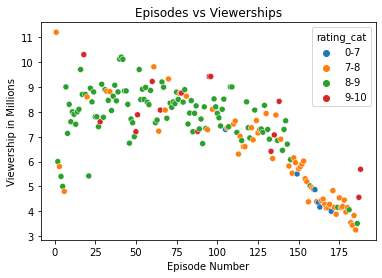

In [68]:
sns.scatterplot(x='Episode_no', y='Viewership', hue='rating_cat', data=data)
plt.xlabel('Episode Number')
plt.ylabel('Viewership in Millions')
plt.title('Episodes vs Viewerships')
plt.show()

## After looking to the graph above we can say that rating of this season also dropped along with the viwership. So, quality of this season was not upto the mark to keep people engaged with it.